# **Imports and Installs**

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# **Load Data**

In [6]:
#Load CSV File of Data into the Google Colab Environment
from google.colab import files
upload = files.upload()
data = pd.read_csv('avocado-updated-2020.csv')

Saving avocado-updated-2020.csv to avocado-updated-2020.csv


# **EDA**

In [7]:
# See top rows of data
data.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


# **Build Network**

In [23]:
# Factors to include in the network
factors = ['average_price', 'total_volume', '4046', '4225', '4770', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'year']

In [24]:
# Create a graph
G = nx.Graph()

In [26]:
# Add nodes for factors
for factor in factors:
    G.add_node(factor)

# Define relationships based on correlations
correlation_threshold = 0.5  # Adjust this threshold as needed
for i, factor1 in enumerate(factors):
    for j, factor2 in enumerate(factors):
        if i < j:  # Avoid adding duplicate edges
            correlation = data[factor1].corr(data[factor2])
            if abs(correlation) >= correlation_threshold:
                G.add_edge(factor1, factor2, weight=correlation)

# **Visualize the Network**

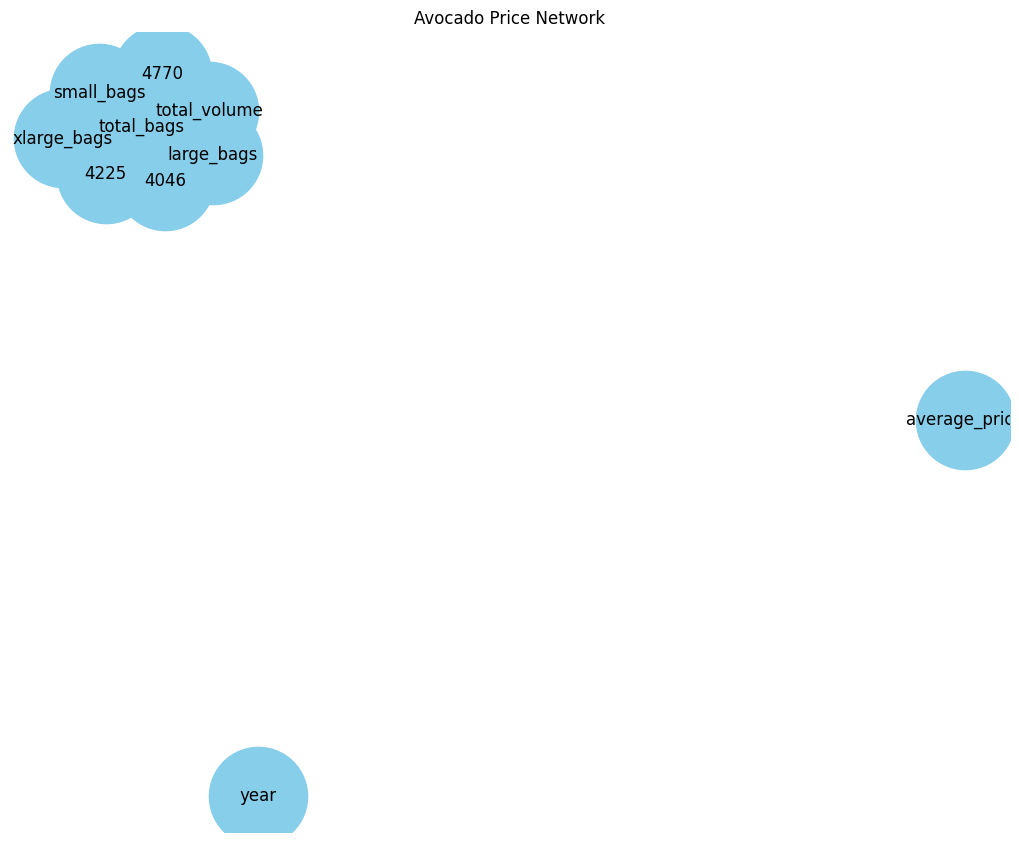

In [27]:
# Visualize the network
pos = nx.spring_layout(G)
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=12, font_color='black', edgelist=edges, width=weights, edge_cmap=plt.cm.Blues, edge_color=weights)
plt.title("Avocado Price Network")
plt.show()